# Developer salary statistics

Dataset from https://mubaris.com/2017-09-09/introduction-to-statistics-using-numpy

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import requests
from IPython.display import display

sns.set_style('whitegrid')

In [3]:
DOWNLOAD_CSV_FILE = False
ORIGINAL_CSV_FILE = 'https://mubaris.com/files/salary.csv'
CSV_FILE = 'data/salaries.csv'

if DOWNLOAD_CSV_FILE:
    content = requests.get(ORIGINAL_CSV_FILE).content
    with open(CSV_FILE, 'wb') as f:
        f.write(content)

df = pd.read_csv(CSV_FILE).rename(columns={
    'Years at Experience': 'experience',
    'Annual Gross Salary (in €, otherwise specify)': 'salary',
    'Gender': 'gender',
    'Country': 'country'
})

In [4]:
os.makedirs('data', exist_ok = True)

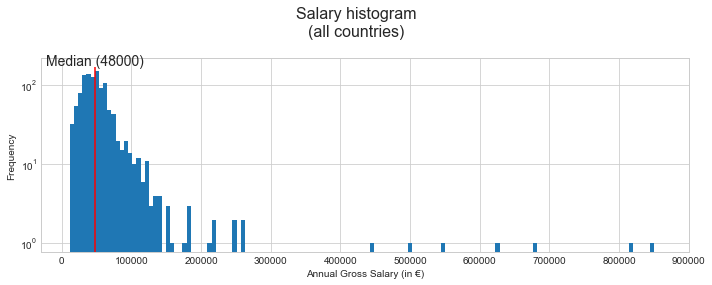

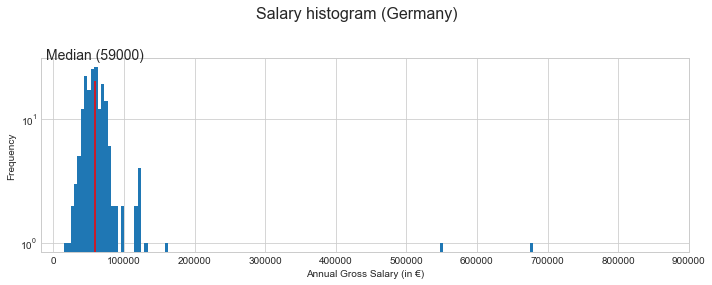

In [13]:
def plot_hist(df, bins = 140, figsize = (10, 4), line_ymax = 170, suptitle = ''):
    fig, ax = plt.subplots(figsize = figsize)
    df.salary.plot(kind = 'hist', bins = bins, ax = ax, log = True)
    ax.vlines(x = df.salary.median(), ymin = 0, ymax = line_ymax, colors = 'red')
    max_salary = df.salary.max()
    ax.set_xticks(np.linspace(0, 1000000, num = 10, endpoint=False))
    ax.set_xlabel('Annual Gross Salary (in €)')
    fig.suptitle(suptitle, fontsize = 16)
    fig.tight_layout()
    fig.subplots_adjust(top = 0.8)
    ax.text(x = df.salary.median(), y = line_ymax + 10, s = 'Median ({:.0f})'.format(df.salary.median()), fontdict={'fontsize': 14}, horizontalalignment = 'center');
    return fig, ax

fig, ax = plot_hist(df, suptitle = 'Salary histogram\n(all countries)')
fig.savefig('data/salary-hist.png', dpi = 300)

fig, ax = plot_hist(df[df.country == 'Germany'], suptitle = 'Salary histogram\n(Germany)', line_ymax = 20)
fig.savefig('data/salary-hist-germany.png', dpi = 300)

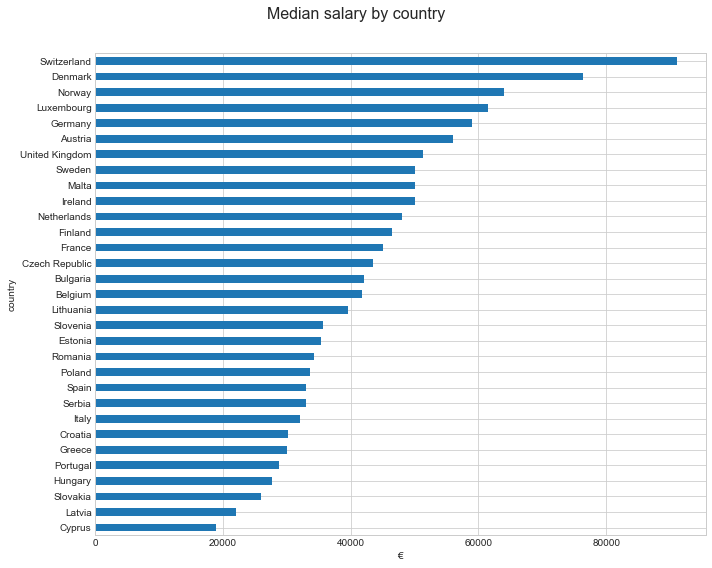

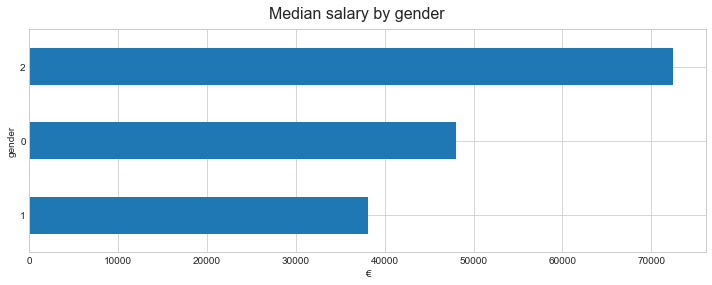

In [6]:
def plot_by(attr, suptitle, figsize = (10, 8)):
    fig, ax = plt.subplots(figsize = figsize)
    df.groupby(attr).salary.median().sort_values().plot(kind = 'barh', ax = ax)
    fig.suptitle(suptitle, fontsize = 16)
    ax.set_xlabel('€')
    fig.tight_layout()
    fig.subplots_adjust(top = .9)
    return fig, ax

fig, ax = plot_by('country', 'Median salary by country')
fig.savefig('data/salary-by-country.png', dpi = 300)
fig, ax = plot_by('gender', 'Median salary by gender', figsize = (10, 4))
fig.savefig('data/salary-by-gender.png', dpi = 300)

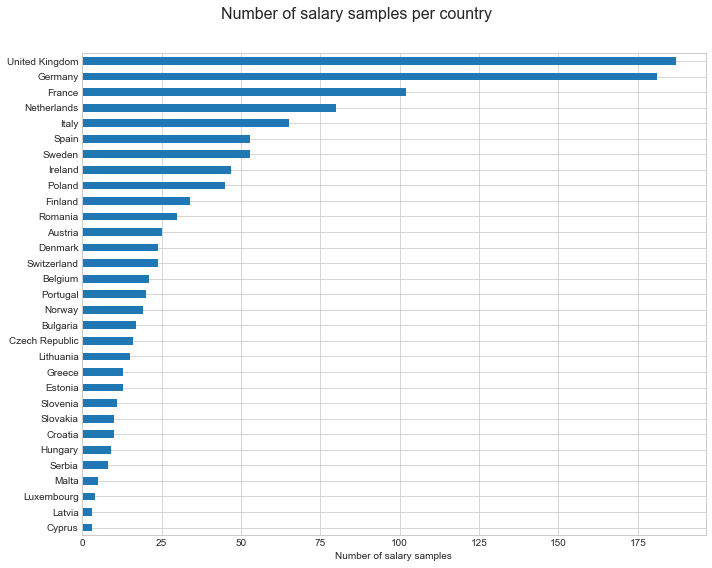

In [7]:
figsize = (10, 8)
fig, ax = plt.subplots(figsize = figsize)
df.country.value_counts().sort_values().plot(kind = 'barh', ax = ax)
ax.set_xlabel('Number of salary samples')
fig.suptitle('Number of salary samples per country', fontsize = 16)
fig.tight_layout()
fig.subplots_adjust(top = .9)
fig.savefig('data/salary-sample-count-per-country.png', dpi = 300)

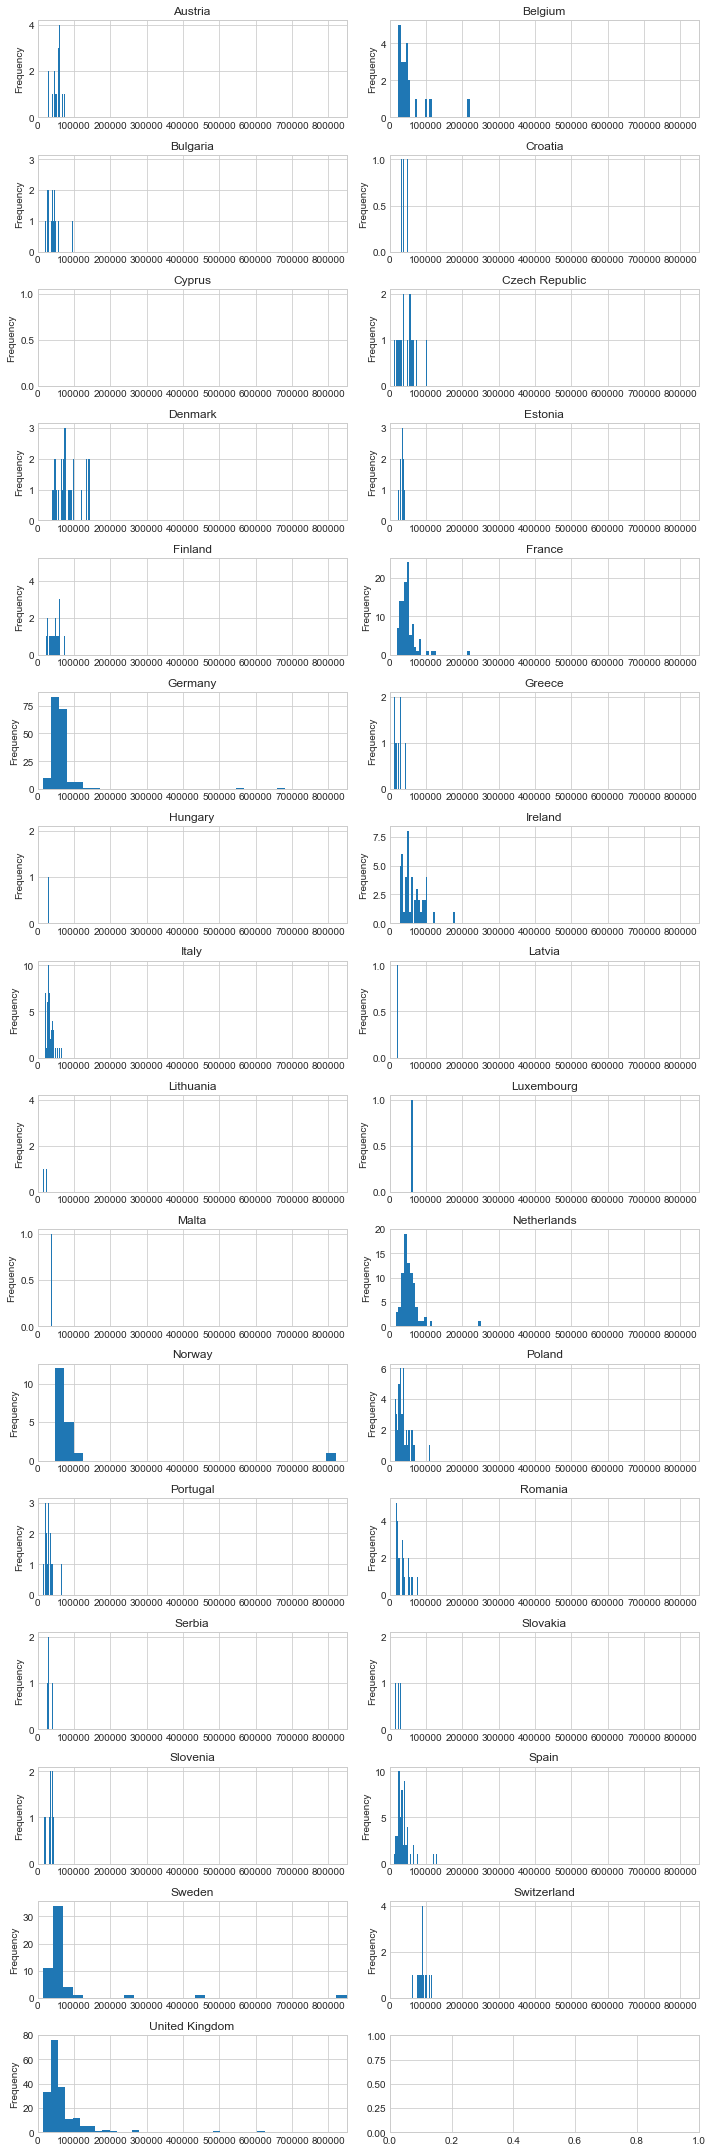

In [8]:
num_countries = len(df.country.value_counts())
num_cols = 2
num_rows = int(np.ceil(num_countries / num_cols))
fig, axes = plt.subplots(ncols = num_cols, nrows = num_rows, figsize = (10, 30))
max_salary = df.salary.max()
for (country, df_country), ax in zip(df.groupby('country'), axes.flatten()):
    df_country.salary.plot(kind = 'hist', bins = 30, ax = ax, title = country, xlim = (0, max_salary))
fig.tight_layout()